# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)





601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "dikson"

query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
print(query_url)
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(weather_json)




http://api.openweathermap.org/data/2.5/weather?appid=765fc2c2322fdf430e02390c99bb9cd5&q=dikson&units=imperial
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.52, 'feels_like': 23.92, 'temp_min': 30.52, 'temp_max': 30.52, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 300, 'gust': 8.61}, 'clouds': {'all': 100}, 'dt': 1652565924, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

latitudes = []
max_temp =[]
windspeed = []
humidity = []
date = []
country = []
cloudiness = []
city_id = []
lons = []
city_names = []

units = "imperial"

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        print(weather_json['coord']['lat'])
        latitudes.append(weather_json['coord']['lat'])
    except KeyError:
        print(f"coord not found")
        pass

    try:
        print(weather_json['main']['temp_max'])
        max_temp.append(weather_json['main']['temp_max'])
    except KeyError:
        print(f"temp not found")
        pass

    try:
        print(weather_json['wind']['speed'])
        windspeed.append(weather_json['wind']['speed'])
    except KeyError:
        print(f"windpseed not found")
        pass

    try:
        print(weather_json['main']['humidity'])
        humidity.append(weather_json['main']['humidity'])
    except KeyError:
        print(f"humidity not found")
        pass

    try:
        print(weather_json['dt'])
        date.append(weather_json['dt'])
    except KeyError:
        print(f"date not found")
        pass

    try:
        print(weather_json['sys']['country'])
        country.append(weather_json['sys']['country'])
    except KeyError:
        print(f"date not found")
        pass

    try:
        print(weather_json['clouds']['all'])
        cloudiness.append(weather_json['clouds']['all'])
    except KeyError:
        print(f"clouds not found")
        pass

    try:
        print(weather_json['id'])
        city_id.append(weather_json['id'])
    except KeyError:
        print(f"id not found")
        pass

    try:
        print(weather_json['coord']['lon'])
        lons.append(weather_json['coord']['lon'])
    except KeyError:
        print(f"coord not found")
        pass

    try:
        print(weather_json['name'])
        city_names.append(weather_json['name'])
    except KeyError:
        print(f"city not found")
        pass


27.9248
60.31
13.8
77
1652565925
ES
20
2511440
-15.5733
San Bartolomé de Tirajana
-45.8667
48.06
9.22
46
1652565925
AR
0
3860443
-67.5
Comodoro Rivadavia
-33.9258
60.91
10
75
1652565926
ZA
2
3369157
18.4232
Cape Town
-23.1203
76.26
21.12
70
1652565926
PF
1
4030556
-134.9692
Rikitea
-24.7911
56.84
1.99
86
1652565691
BR
99
3466704
-50.0119
Castro
-24.8667
62.76
16.87
53
1652565927
AU
0
2074865
113.6333
Carnarvon
5.6667
82.44
21.92
75
1652565927
MV
100
1337619
73
Ugoofaaru
32.6667
68
6.87
80
1652565928
PT
13
2264557
-17.1
Ponta do Sol
-46.1927
42.48
3.09
83
1652565928
NZ
76
6201424
168.8643
Mataura
-42.7826
56.88
1.01
75
1652565929
AU
50
2155415
147.0587
New Norfolk
47.6931
56.61
8.72
96
1652565930
RU
99
528242
40.1025
Mayskiy
12.4497
77.2
9.55
93
1652565930
PH
100
1730622
125.2886
Anito
63.8424
45.07
26.46
93
1652565931
IS
75
3416888
-22.4338
Grindavik
55.7435
44.76
5.75
93
1652565869
CA
100
6165406
-97.8558
Thompson
-0.6
82.83
10.69
68
1652565932
MV
98
1282256
73.0833
Hithadhoo
22.8909


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
cities_df = pd.DataFrame({
    'City':city_names,
    'Lat': latitudes,
    'Lng': lons,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': windspeed,
    'Country': country,
    'Date': date,
})


#Save Output File to csv
cities_df.to_csv("output/cities.csv")

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Bartolomé de Tirajana,27.9248,-15.5733,60.31,77,20,13.80,ES,1652565925
1,Comodoro Rivadavia,-45.8667,-67.5000,48.06,46,0,9.22,AR,1652565925
2,Cape Town,-33.9258,18.4232,60.91,75,2,10.00,ZA,1652565926
3,Rikitea,-23.1203,-134.9692,76.26,70,1,21.12,PF,1652565926
4,Castro,-24.7911,-50.0119,56.84,86,99,1.99,BR,1652565691


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity100_df = cities_df.loc[(
    cities_df["Humidity"] > 100)]
humidity100_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

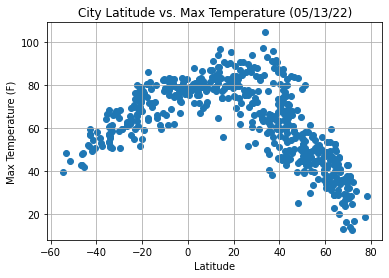

In [10]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/13/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

Latitude has an effect on temperature in the way that, the further the locations are from the ecuator the less light they receive. 
Therefore, their temperature drop as we can see from this figure. The temperatures are lower on the far left and on the far right of our figure.

## Latitude vs. Humidity Plot

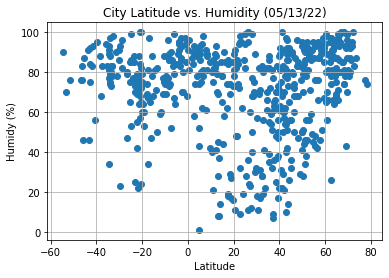

In [11]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/13/22)")
plt.ylabel("Humidy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

Humidity is higher in locations that are further from the ecuator

## Latitude vs. Cloudiness Plot

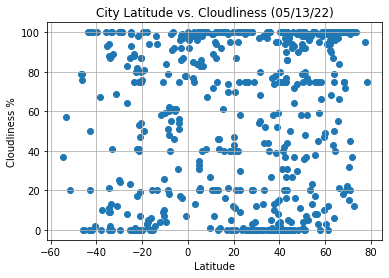

In [12]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudliness (05/13/22)")
plt.ylabel("Cloudliness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

This scatter plot shows that there are more clouds on locations on the North than there are on the South

## Latitude vs. Wind Speed Plot

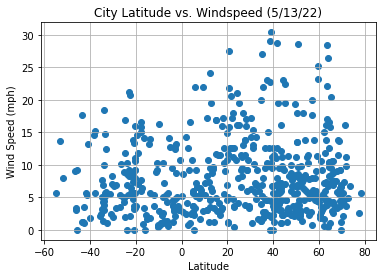

In [13]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (5/13/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

The majority of these locations have wind speeds between 0mph and 15mph

## Linear Regression

In [14]:
# Show only Latitude greater or equal to 0 
northern_df = cities_df.loc[(
    cities_df["Lat"] >= 0)]
northern_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Bartolomé de Tirajana,27.9248,-15.5733,60.31,77,20,13.80,ES,1652565925
6,Ugoofaaru,5.6667,73.0000,82.44,75,100,21.92,MV,1652565927
7,Ponta do Sol,32.6667,-17.1000,68.00,80,13,6.87,PT,1652565928
10,Mayskiy,47.6931,40.1025,56.61,96,99,8.72,RU,1652565930
11,Anito,12.4497,125.2886,77.20,93,100,9.55,PH,1652565930


In [15]:
# Show only Latitude less than 0 
southern_df = cities_df.loc[(
    cities_df["Lat"] < 0)]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Comodoro Rivadavia,-45.8667,-67.5000,48.06,46,0,9.22,AR,1652565925
2,Cape Town,-33.9258,18.4232,60.91,75,2,10.00,ZA,1652565926
3,Rikitea,-23.1203,-134.9692,76.26,70,1,21.12,PF,1652565926
4,Castro,-24.7911,-50.0119,56.84,86,99,1.99,BR,1652565691
5,Carnarvon,-24.8667,113.6333,62.76,53,0,16.87,AU,1652565927


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: -0.8197459074342446
R squared: 0.671983352755193
pvalue: 6.85477623339135e-98


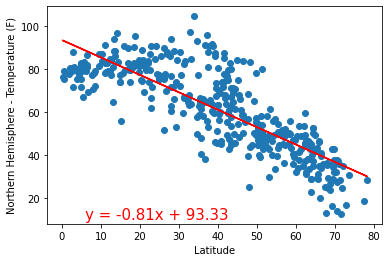

In [16]:
from scipy.stats import linregress
## Convert to floats and store as Latitude and Temperature as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Temperature (F)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.8188048998514587
R squared: 0.6704414640207572
pvalue: 1.0379556733427232e-38


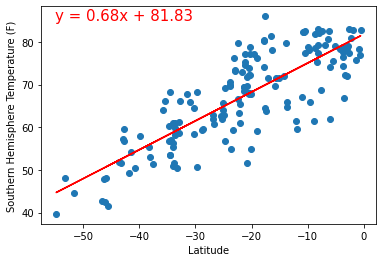

In [17]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Temperature as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Temperature (F)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")
# Show plot
plt.show()

There is a strong correlation between where a location is and its temperature. The above two plots show us that temperature decreases
as the location moves away from the center of 0. This is because the further away the locations are from the ecuator the lower the temperatures
because they get less direct sunlight.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.22670223222486996
R squared: 0.051393902095738866
pvalue: 4.922108153427163e-06


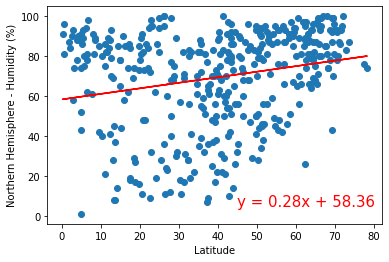

In [18]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Humidity as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Humidity (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.04743294188678284
R squared: 0.002249883976034918
pvalue: 0.5578182281868174


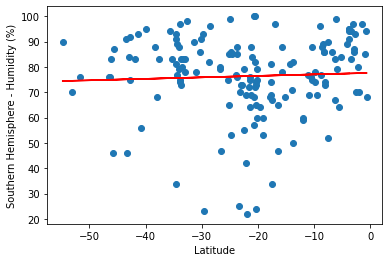

In [19]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Humidity as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Humidity (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The about two figures show us that there is not a strong correlation relationship between humidity and latitude. We can also see that by noting that their r-values are low, meaning that their relationship is not strong

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.16154635400959583
R squared: 0.026097224493793657
pvalue: 0.0012208237883624806


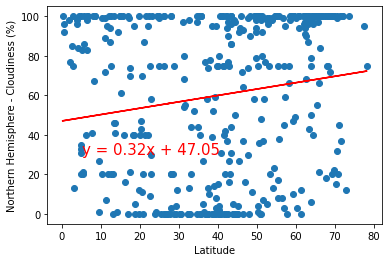

In [20]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Cloudiness (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.10831989816416689
R squared: 0.011733200338295485
pvalue: 0.17972355068378124


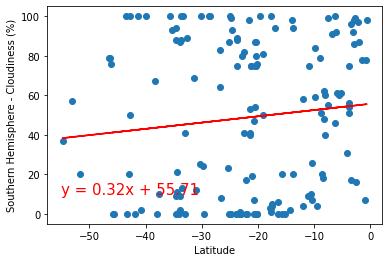

In [21]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Cloudiness (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The above two figures show us that there is no strong correlation relationship between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.030812276652873324
R squared: 0.0009493963925332026
pvalue: 0.5399324531187424


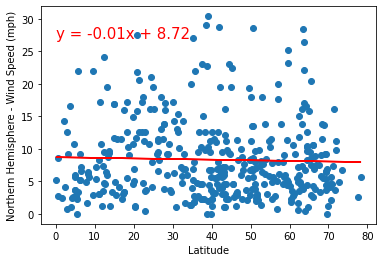

In [22]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Wind Speed (mph)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.053094873672116905
R squared: 0.002819065610258053
pvalue: 0.511735245009052


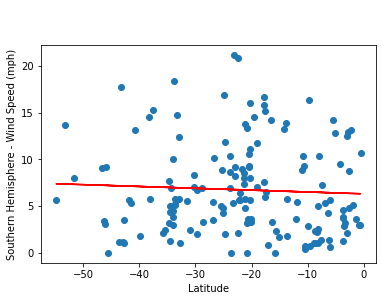

In [23]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Wind Speed (mph)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The last two figures show is that there is no strong correlation relationship between wind speed and latitude on the Southern nor Northern Hemisphere